In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [2]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
def abs_sobel_thresh(img, orient='x',sobel_kernel=3,thresh=(0,255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # try this Adi
    gray = cv2.GaussianBlur(gray,(sobel_kernel,sobel_kernel),0)

    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0,ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1,ksize=sobel_kernel))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output

In [3]:
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # try this Adi
    gray = cv2.GaussianBlur(gray,(sobel_kernel,sobel_kernel),0)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    #print(sobelx.shape)
    #print(sobely.shape)
    # 3) Calculate the magnitude 
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    #print(gradmag)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output
    

In [4]:
# direction of the gradient
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # try this Adi
    gray = cv2.GaussianBlur(gray,(sobel_kernel,sobel_kernel),0)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

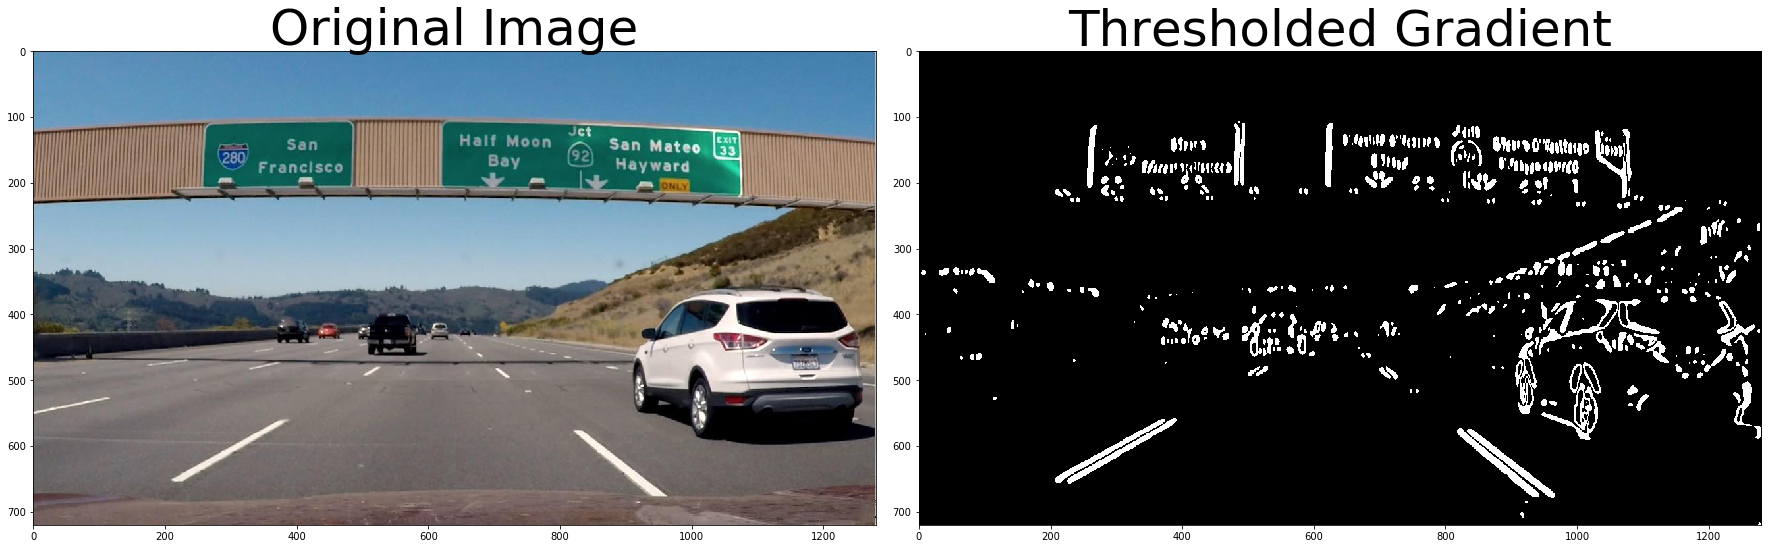

In [5]:
# Read in an image and grayscale it
image = mpimg.imread('examples/signs_vehicles_xygrad.jpg')

# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', sobel_kernel=15, thresh=(25, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


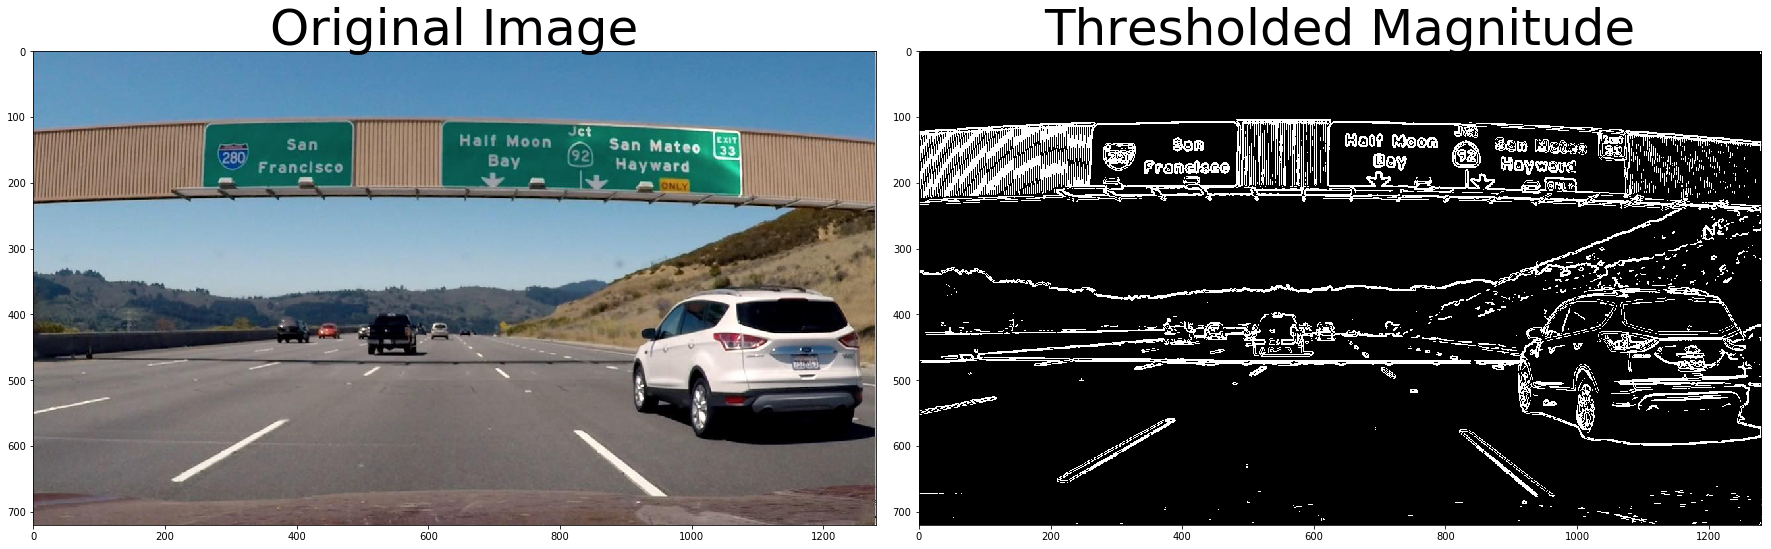

In [6]:
# Read in an image and grayscale it
image = mpimg.imread('examples/signs_vehicles_xygrad.jpg')
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

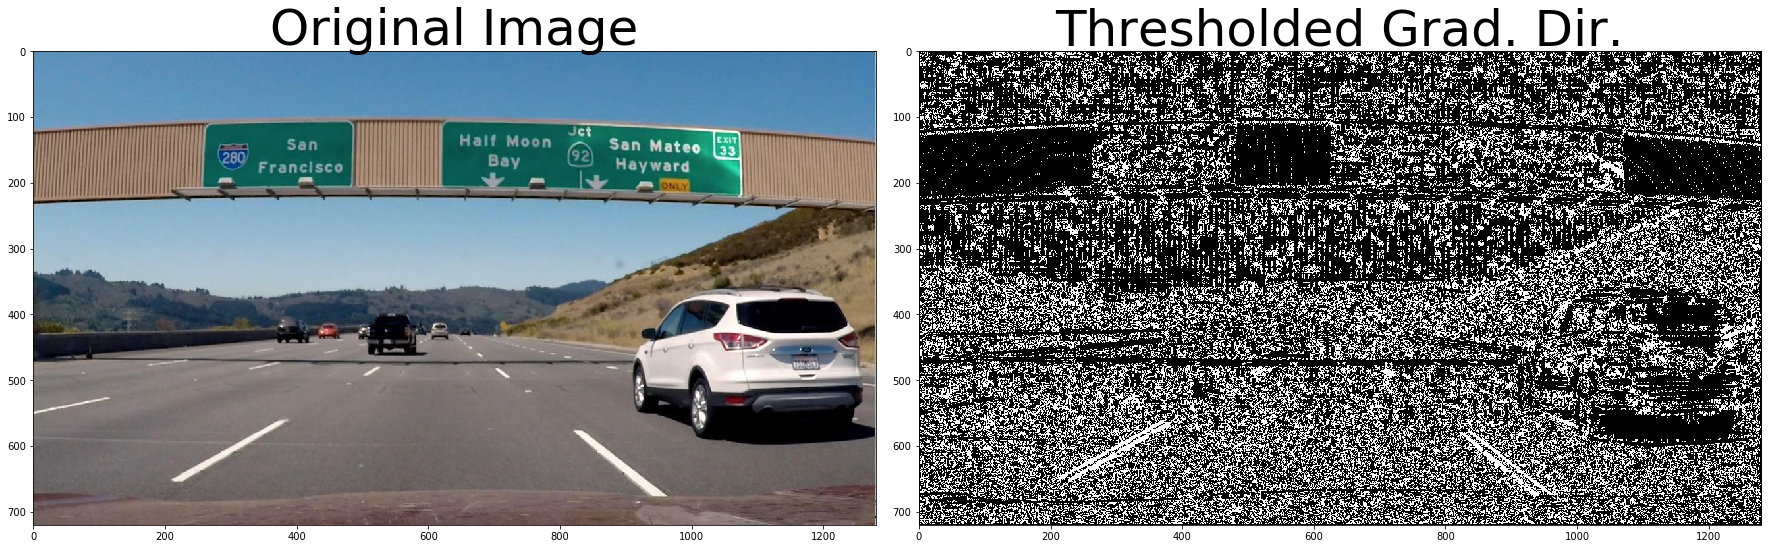

In [7]:
# Read in an image and grayscale it
image = mpimg.imread('examples/signs_vehicles_xygrad.jpg')
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=3, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

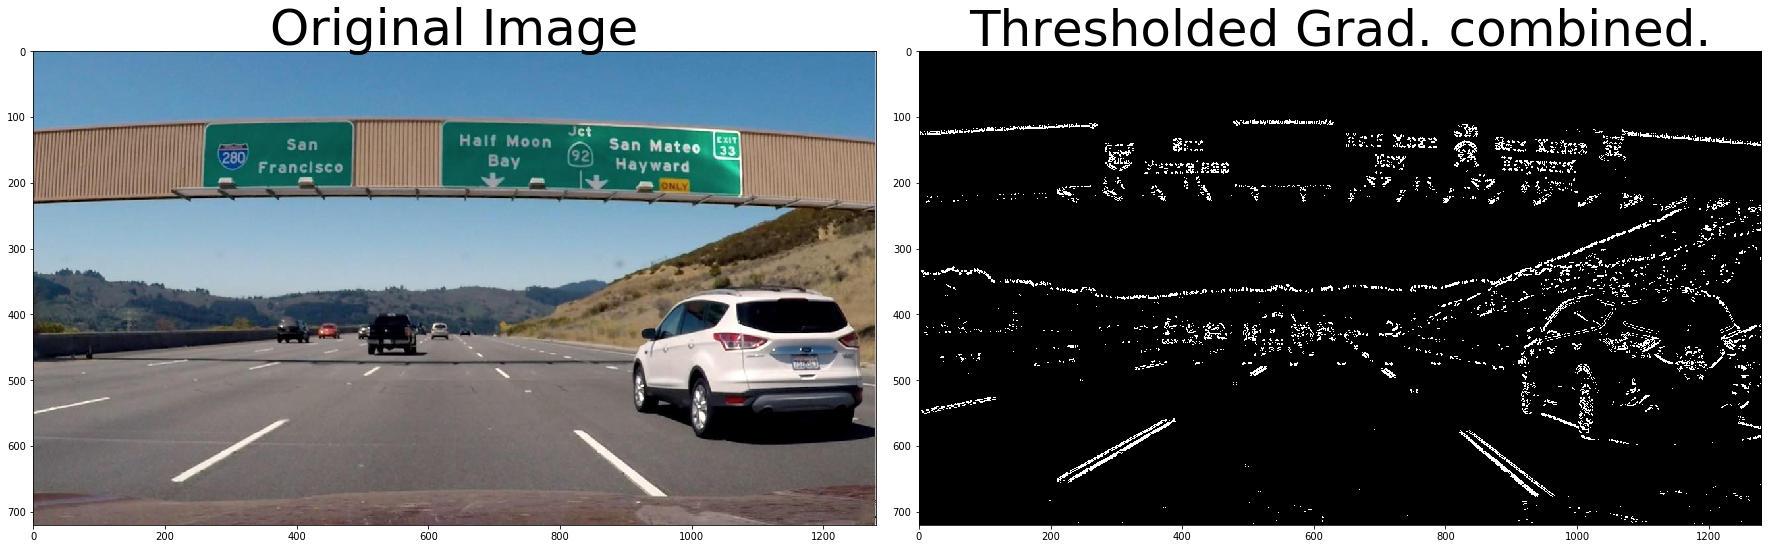

In [8]:
# Read in an image and grayscale it
image = mpimg.imread('examples/signs_vehicles_xygrad.jpg')

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(12, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(25, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(25, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
#combined[((mag_binary == 1) & (dir_binary == 1))] = 1
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Grad. combined.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

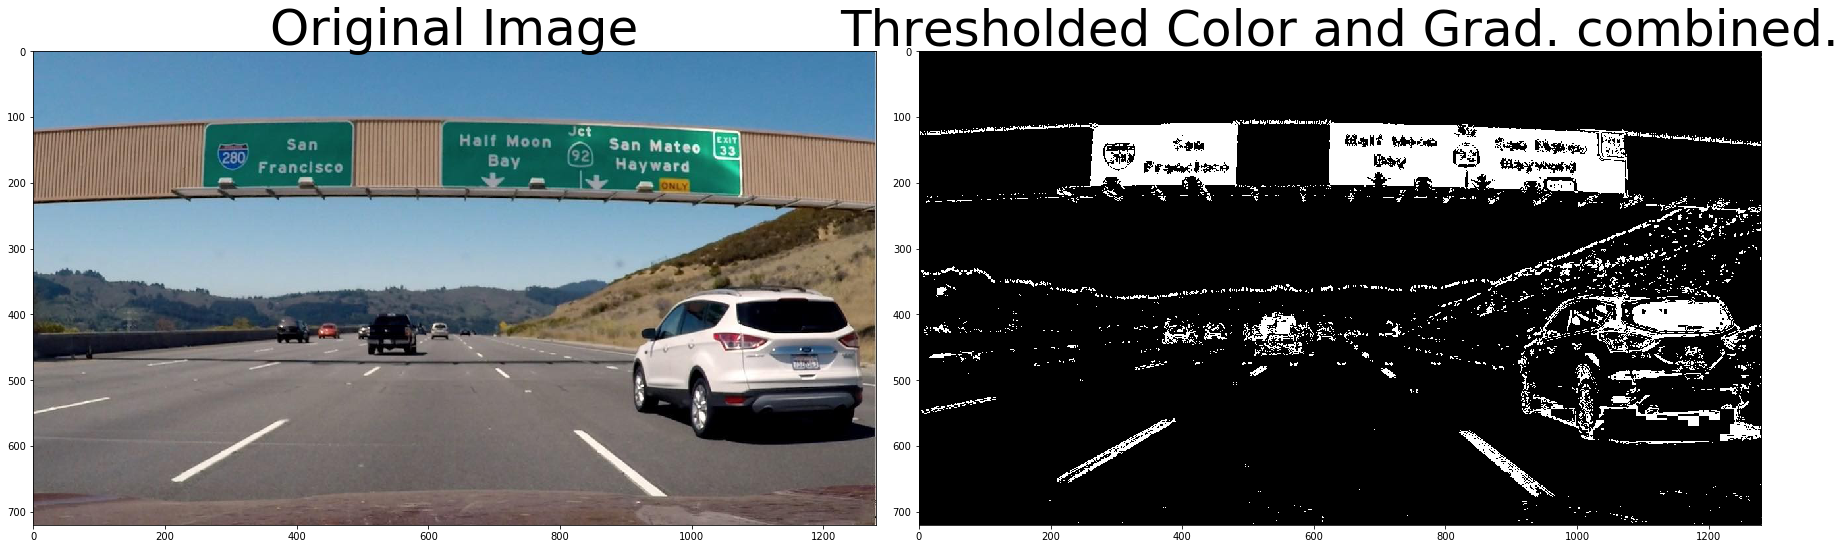

In [9]:
image = mpimg.imread('examples/signs_vehicles_xygrad.jpg')
color_and_gradient_binary = np.zeros_like(image[:,:,0])
ksize = 3
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(12, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(25, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(25, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
   

sthresh=(150,255)

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= sthresh[0]) & (s_channel <= sthresh[1])] = 1
    
color_and_gradient_binary[(s_binary == 1) | (combined == 1)] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(color_and_gradient_binary, cmap='gray')
ax2.set_title('Thresholded Color and Grad. combined.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

320.0
 p1 [588.8000000000001, 446.4] p2 [691.2, 446.4] p3 [1126.4, 673.2] p4 [153.6, 673.2] 
[[ 588.8  446.4]
 [ 691.2  446.4]
 [1126.4  673.2]
 [ 153.6  673.2]] [[320.   0.]
 [960.   0.]
 [960. 720.]
 [320. 720.]]


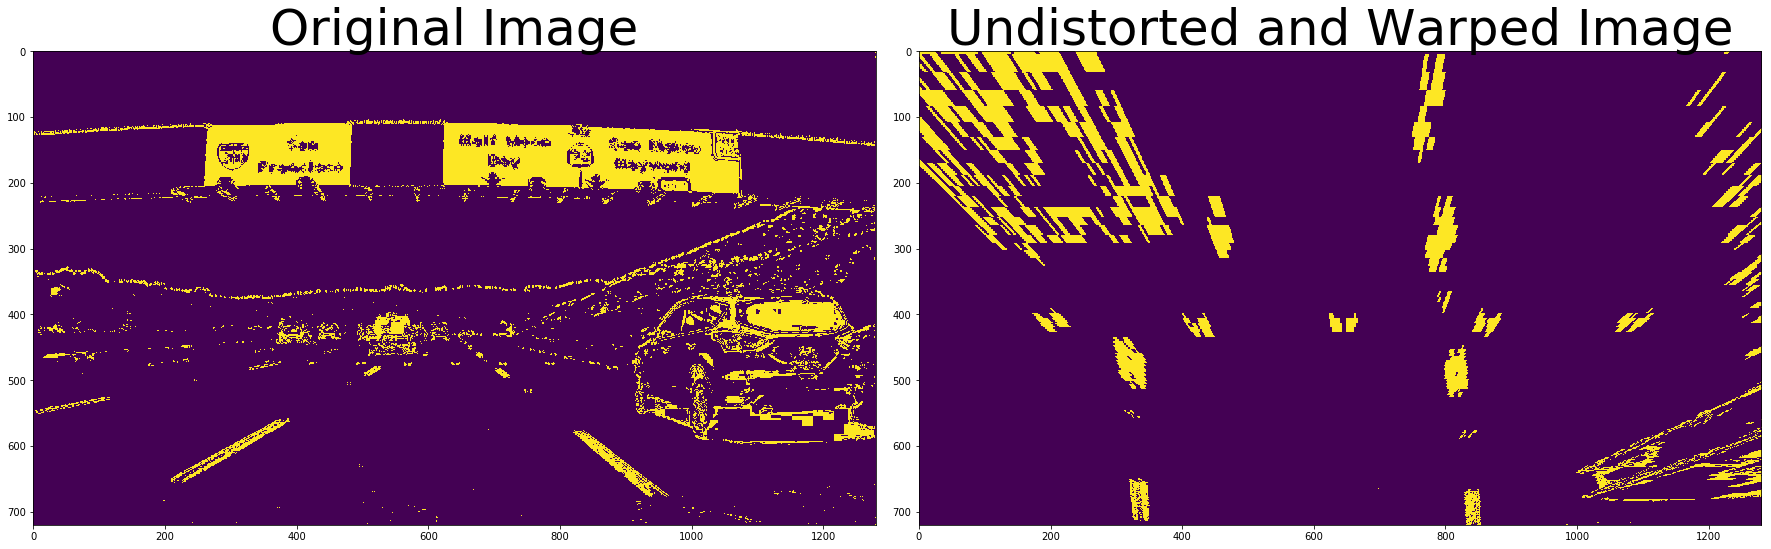

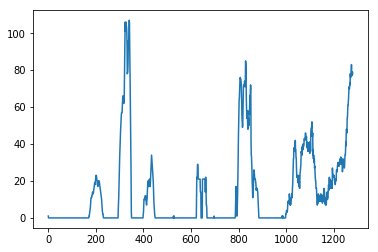

In [27]:



img = color_and_gradient_binary    
img_size = (color_and_gradient_binary.shape[1], color_and_gradient_binary.shape[0])
    
bot_width = .76
#mid_width = .08
mid_width = .08
#height_pct = .62
height_pct = .62
bottom_trim = .935
offset = img_size[0]*.25
print ( offset )
top_left = p1 = [img.shape[1]*(.5 - mid_width/2), img.shape[0]*height_pct]
top_right = p2 = [img.shape[1]*(.5 + mid_width/2), img.shape[0]*height_pct]
bottom_right = p3 = [img.shape[1]*(.5 + bot_width/2), img.shape[0]*bottom_trim]

bottom_left = p4 = [img.shape[1]*(.5 - bot_width/2), img.shape[0]*bottom_trim]
print( " p1 {} p2 {} p3 {} p4 {} ".format(p1,p2,p3,p4))
src = np.float32([p1,p2,p3,p4])
dst = np.float32([[offset, 0], [img_size[0] - offset, 0], [img_size[0] - offset, img_size[1]], [offset, img_size[1]]])
left2_x,left2_y = (585,455)

right1_x,right1_y = (705,455)
right2_x,right2_y = (1130,720)
left1_x,left1_y = (190,720)

#src = np.float32([ 
#    [left2_x, left2_y],
#    [right1_x, right1_y],
#    [right2_x, right2_y],
# [left1_x, left1_y]
#])

#offset = 200
#dst = np.float32([
#    [offset, 0],
#    [img_size[0]-offset, 0],
#    [img_size[0]-offset, img_size[1]], 
#    [offset, img_size[1]]
#])

#src = np.float32([leftupperpoint, leftlowerpoint, rightupperpoint, rightlowerpoint])
#dst = np.float32([[568,470], [717,470], [260,680], [1043,680]])

print ( src , dst )

# Given src and dst points, calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)

# Warp the image using OpenCV warpPerspective()
warped = cv2.warpPerspective(color_and_gradient_binary, M, img_size, flags=cv2.INTER_NEAREST)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(color_and_gradient_binary)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


histogram = np.sum(warped[warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)
plt.show()